In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import umap.umap_ as umap # !pip3 install umap-learn
%run 'Setup.py'
X_train = x_train
X_test = x_test

## Practical Assignments STEPS

### 1. EDA: Distribution of genres, Range and type of feature values, Outliers?

### 2. Feature Engineering: Collinearity, Feature selection: ANOVA, Decision Trees, Feature Extraction: PCA, t-SNE, UMAP

### 3. Model Selection:

### 4. Model Training and Tuning:

### 5. Evaluation:


## Explanatory Data Analysis

In [2]:
X_train

chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  \
Id                                                       
0                   -0.266585                -0.984668   
1                   -0.180061                 0.260884   
2                   -0.692900                 0.356662   
3                    0.243339                 0.214182   
4                   -0.968576                 0.309255   
...                       ...                      ...   
5995                 0.503490                -0.540720   
5996                -0.600597                 0.406386   
5997                -1.014298                -0.950744   
5998                -0.002938                 0.646034   
5999                -0.881917                -0.615638   

      chroma_cens_kurtosis_03  chroma_cens_kurtosis_04  \
Id                                                       
0                   -0.729823                -0.895122   
1                   -0.069373                 0.208734   
2                    0.062617                 0.248280   
3                   -0.049026                 1.456255   
4                    0.223164                 0.160960   
...                       ...                      ...   
5995                -0.690117                -0.107338   
5996                -0.748409                -0.316157   
5997                 0.618304                 0.204298   
5998                -0.732819                 1.205990   
5999                 0.891155                 4.850262   

      chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
Id                                                       
0                    2.138628                 0.935209   
1                   -0.078855                -0.577818   
2                    3.470037                 0.166613   
3                   -0.360826                -0.875256   
4                    0.919838                -0.111985   
...                       ...                      ...   
5995                -0.647856                -0.681969   
5996                -0.507428                -0.054214   
5997                -0.788411                -0.794254   
5998                -0.898733                -0.684953   
5999                -0.349280                -1.010980   

      chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  \
Id                                                       
0                    0.104089                -0.698659   
1                    0.583788                 0.143781   
2                    0.823874                 0.181112   
3                   -0.770200                 0.315500   
4                   -1.012521                -0.665692   
...                       ...                      ...   
5995                -0.246245                -0.546552   
5996                -0.476804                -0.373120   
5997                -0.586847                 0.099172   
5998                 0.134642                -0.374792   
5999                -0.577905                -0.046604   

      chroma_cens_kurtosis_09  chroma_cens_kurtosis_10  ...  tonnetz_std_04  \
Id                                                      ...                   
0                   -0.736408                -0.334376  ...        0.065003   
1                    0.291556                 0.007314  ...        0.087692   
2                    0.551939                 0.357985  ...        0.132387   
3                    0.789956                 0.448319  ...        0.071478   
4                   -0.316646                -0.264381  ...        0.106220   
...                       ...                      ...  ...             ...   
5995                 0.062783                 0.070393  ...        0.084929   
5996                -0.930158                -1.080690  ...        0.075407   
5997                -0.313476                -0.523417  ...        0.138591   
5998                -0.019524                -1.016032  ...        0.137695   
5999                -0.828026         

In [3]:
# Feature Types are all float64
X_train.dtypes

chroma_cens_kurtosis_01    float64
chroma_cens_kurtosis_02    float64
chroma_cens_kurtosis_03    float64
chroma_cens_kurtosis_04    float64
chroma_cens_kurtosis_05    float64
                            ...   
zcr_mean_01                float64
zcr_median_01              float64
zcr_min_01                 float64
zcr_skew_01                float64
zcr_std_01                 float64
Length: 518, dtype: object

### Distribution of Genres

<Axes: xlabel='Genre'>

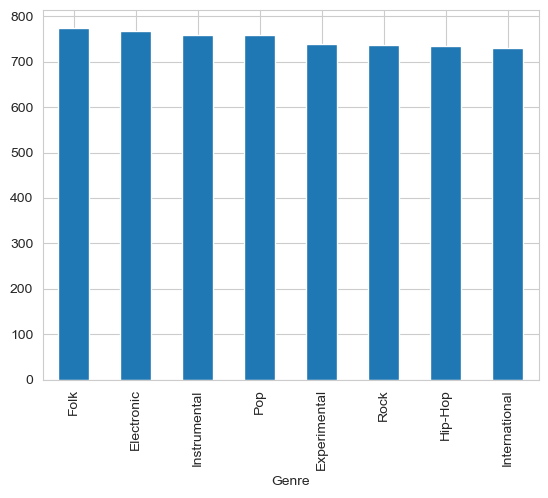

In [4]:
y_train["Genre"].value_counts().plot(kind='bar')

In [5]:
df_merged = pd.merge(y_train, X_train, on='Id', how='inner')

In [6]:
# Summary Statistics on the whole data set
df_summary = np.transpose(df_merged.describe())
df_summary

count      mean       std       min       25%  \
chroma_cens_kurtosis_01  6000.0  0.107609  1.622556 -1.750532 -0.687784   
chroma_cens_kurtosis_02  6000.0  0.012346  1.911876 -1.816620 -0.732581   
chroma_cens_kurtosis_03  6000.0  0.127187  1.897625 -1.825738 -0.688573   
chroma_cens_kurtosis_04  6000.0 -0.002926  1.241022 -1.760243 -0.700126   
chroma_cens_kurtosis_05  6000.0  0.061176  1.659644 -1.781202 -0.728725   
...                         ...       ...       ...       ...       ...   
zcr_mean_01              6000.0  0.050551  0.028198  0.003490  0.032310   
zcr_median_01            6000.0  0.041315  0.027149  0.000000  0.024414   
zcr_min_01               6000.0  0.002485  0.004728  0.000000  0.000000   
zcr_skew_01              6000.0  3.551028  3.019898 -3.143864  1.648752   
zcr_std_01               6000.0  0.040297  0.025636  0.002608  0.022645   

                              50%       75%        max  
chroma_cens_kurtosis_01 -0.221944  0.422105  42.851593  
chroma_cens_kurtosis_02 -0.288179  0.336494  79.781960  
chroma_cens_kurtosis_03 -0.219804  0.427675  75.713921  
chroma_cens_kurtosis_04 -0.262057  0.325397  23.989765  
chroma_cens_kurtosis_05 -0.271311  0.375869  43.405674  
...                           ...       ...        ...  
zcr_mean_01              0.046176  0.062466   0.629665  
zcr_median_01            0.036621  0.051758   0.749512  
zcr_min_01               0.000977  0.003418   0.170898  
zcr_skew_01              2.734890  4.623893  36.000904  
zcr_std_01               0.033870  0.051150   0.285275  

[518 rows x 8 columns]

In [7]:
# Summary Statistics categorized by Genre
df_summary_genre = np.transpose(df_merged.groupby("Genre").describe())
df_summary_genre

Genre                          Electronic  Experimental        Folk  \
chroma_cens_kurtosis_01 count  767.000000    739.000000  775.000000   
                        mean     0.113109      0.260383    0.134440   
                        std      1.197379      1.663332    2.588868   
                        min     -1.660720     -1.616775   -1.631975   
                        25%     -0.676622     -0.598612   -0.786163   
...                                   ...           ...         ...   
zcr_std_01              min      0.005384      0.002608    0.004796   
                        25%      0.032783      0.020847    0.018293   
                        50%      0.046783      0.032354    0.026234   
                        75%      0.064067      0.052439    0.038463   
                        max      0.181253      0.285275    0.161899   

Genre                             Hip-Hop  Instrumental  International  \
chroma_cens_kurtosis_01 count  734.000000    759.000000     731.000000   
                        mean     0.088674      0.035599      -0.020695   
                        std      1.224810      2.145448       0.962064   
                        min     -1.712478     -1.750532      -1.718295   
                        25%     -0.604703     -0.907628      -0.599006   
...                                   ...           ...            ...   
zcr_std_01              min      0.004279      0.004927       0.006463   
                        25%      0.036697      0.014154       0.024375   
                        50%      0.050841      0.022367       0.032726   
                        75%      0.067683      0.037239       0.045842   
                        max      0.192075      0.230484       0.131864   

Genre                                 Pop        Rock  
chroma_cens_kurtosis_01 count  758.000000  737.000000  
                        mean    -0.038665    0.291198  
                        std      0.983710    1.376216  
                        min     -1.563389   -1.592557  
                        25%     -0.698441   -0.505099  
...                                   ...         ...  
zcr_std_01              min      0.006301    0.006674  
                        25%      0.026258    0.021994  
                        50%      0.035473    0.029324  
                        75%      0.049541    0.040303  
                        max      0.168907    0.137388  

[4144 rows x 8 columns]

In [3]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ANOVA F-Test

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Top 200 features
k = 200

# Create the SelectKBest with the ANOVA F-test
selector = SelectKBest(f_classif, k=k)

# Fit to the training data and transform it
X_train_selected = selector.fit_transform(X_train, y_train.values.ravel())

# Transform the test data (do not fit the selector to the test data to avoid data leakage)
X_test_selected = selector.transform(X_test)

# Now, X_train_selected and X_test_selected have only the selected features

# Print the features selected by the model
selected_features_indices = selector.get_support(indices=True)

all_features_scores = selector.scores_

# Get the scores for the selected features
selected_features_scores = all_features_scores[selected_features_indices]

# Print the selected features and their scores
for idx, score in zip(selected_features_indices, selected_features_scores):
    print(f"Feature index: {idx}, Score: {score}")
    
#print(f"Features selected by ANOVA F-test: {selected_features}")

Feature index: 72, Score: 41.17854582885014
Feature index: 73, Score: 37.17885363706247
Feature index: 74, Score: 44.12651166129769
Feature index: 76, Score: 42.354553965826284
Feature index: 77, Score: 39.13591847038427
Feature index: 79, Score: 39.52518631664132
Feature index: 81, Score: 46.675045331599584
Feature index: 82, Score: 36.24601617712366
Feature index: 83, Score: 40.88814896753173
Feature index: 109, Score: 36.25888512174497
Feature index: 111, Score: 42.50655164257669
Feature index: 112, Score: 36.6041685653491
Feature index: 113, Score: 41.16446408958832
Feature index: 125, Score: 37.44567784848914
Feature index: 192, Score: 63.7555412470452
Feature index: 193, Score: 77.61728227621535
Feature index: 194, Score: 61.77169373852747
Feature index: 195, Score: 89.19797843574906
Feature index: 196, Score: 73.28865468891739
Feature index: 197, Score: 79.68070281748744
Feature index: 198, Score: 70.45730972381016
Feature index: 199, Score: 48.76412310870514
Feature index: 200,

## Correlation Analysis

In [3]:
df = X_train
# Let's find out unique statistics used in the column names
stats_keywords = set()
for col in df.columns:
    # Split the column name by underscore and take the second last element
    stat_keyword = col.rsplit('_', 2)[-2]
    stats_keywords.add(stat_keyword)

# Now we create a dictionary of dataframes for each statistical measurement
dfs_by_stat = {stat: df.filter(like=f'_{stat}_') for stat in stats_keywords}

df_mean = dfs_by_stat['mean']
df_std = dfs_by_stat['std']
df_min = dfs_by_stat['min']
df_median = dfs_by_stat['median']
df_max = dfs_by_stat['max']
df_skew = dfs_by_stat['skew']
df_kurtosis = dfs_by_stat['kurtosis']

correlation_mean = df_mean.corr()
correlation_std = df_std.corr()
correlation_min = df_min.corr()
correlation_median = df_median.corr()
correlation_max = df_max.corr()
correlation_skew = df_skew.corr()
correlation_kurtosis = df_kurtosis.corr()

upper_tri_mean = np.triu_indices_from(correlation_mean, k=1)
upper_tri_std = np.triu_indices_from(correlation_std, k=1)
upper_tri_min = np.triu_indices_from(correlation_min, k=1)
upper_tri_median = np.triu_indices_from(correlation_median, k=1)
upper_tri_max = np.triu_indices_from(correlation_max, k=1)
upper_tri_skew = np.triu_indices_from(correlation_skew, k=1)
upper_tri_kurtosis = np.triu_indices_from(correlation_kurtosis, k=1)


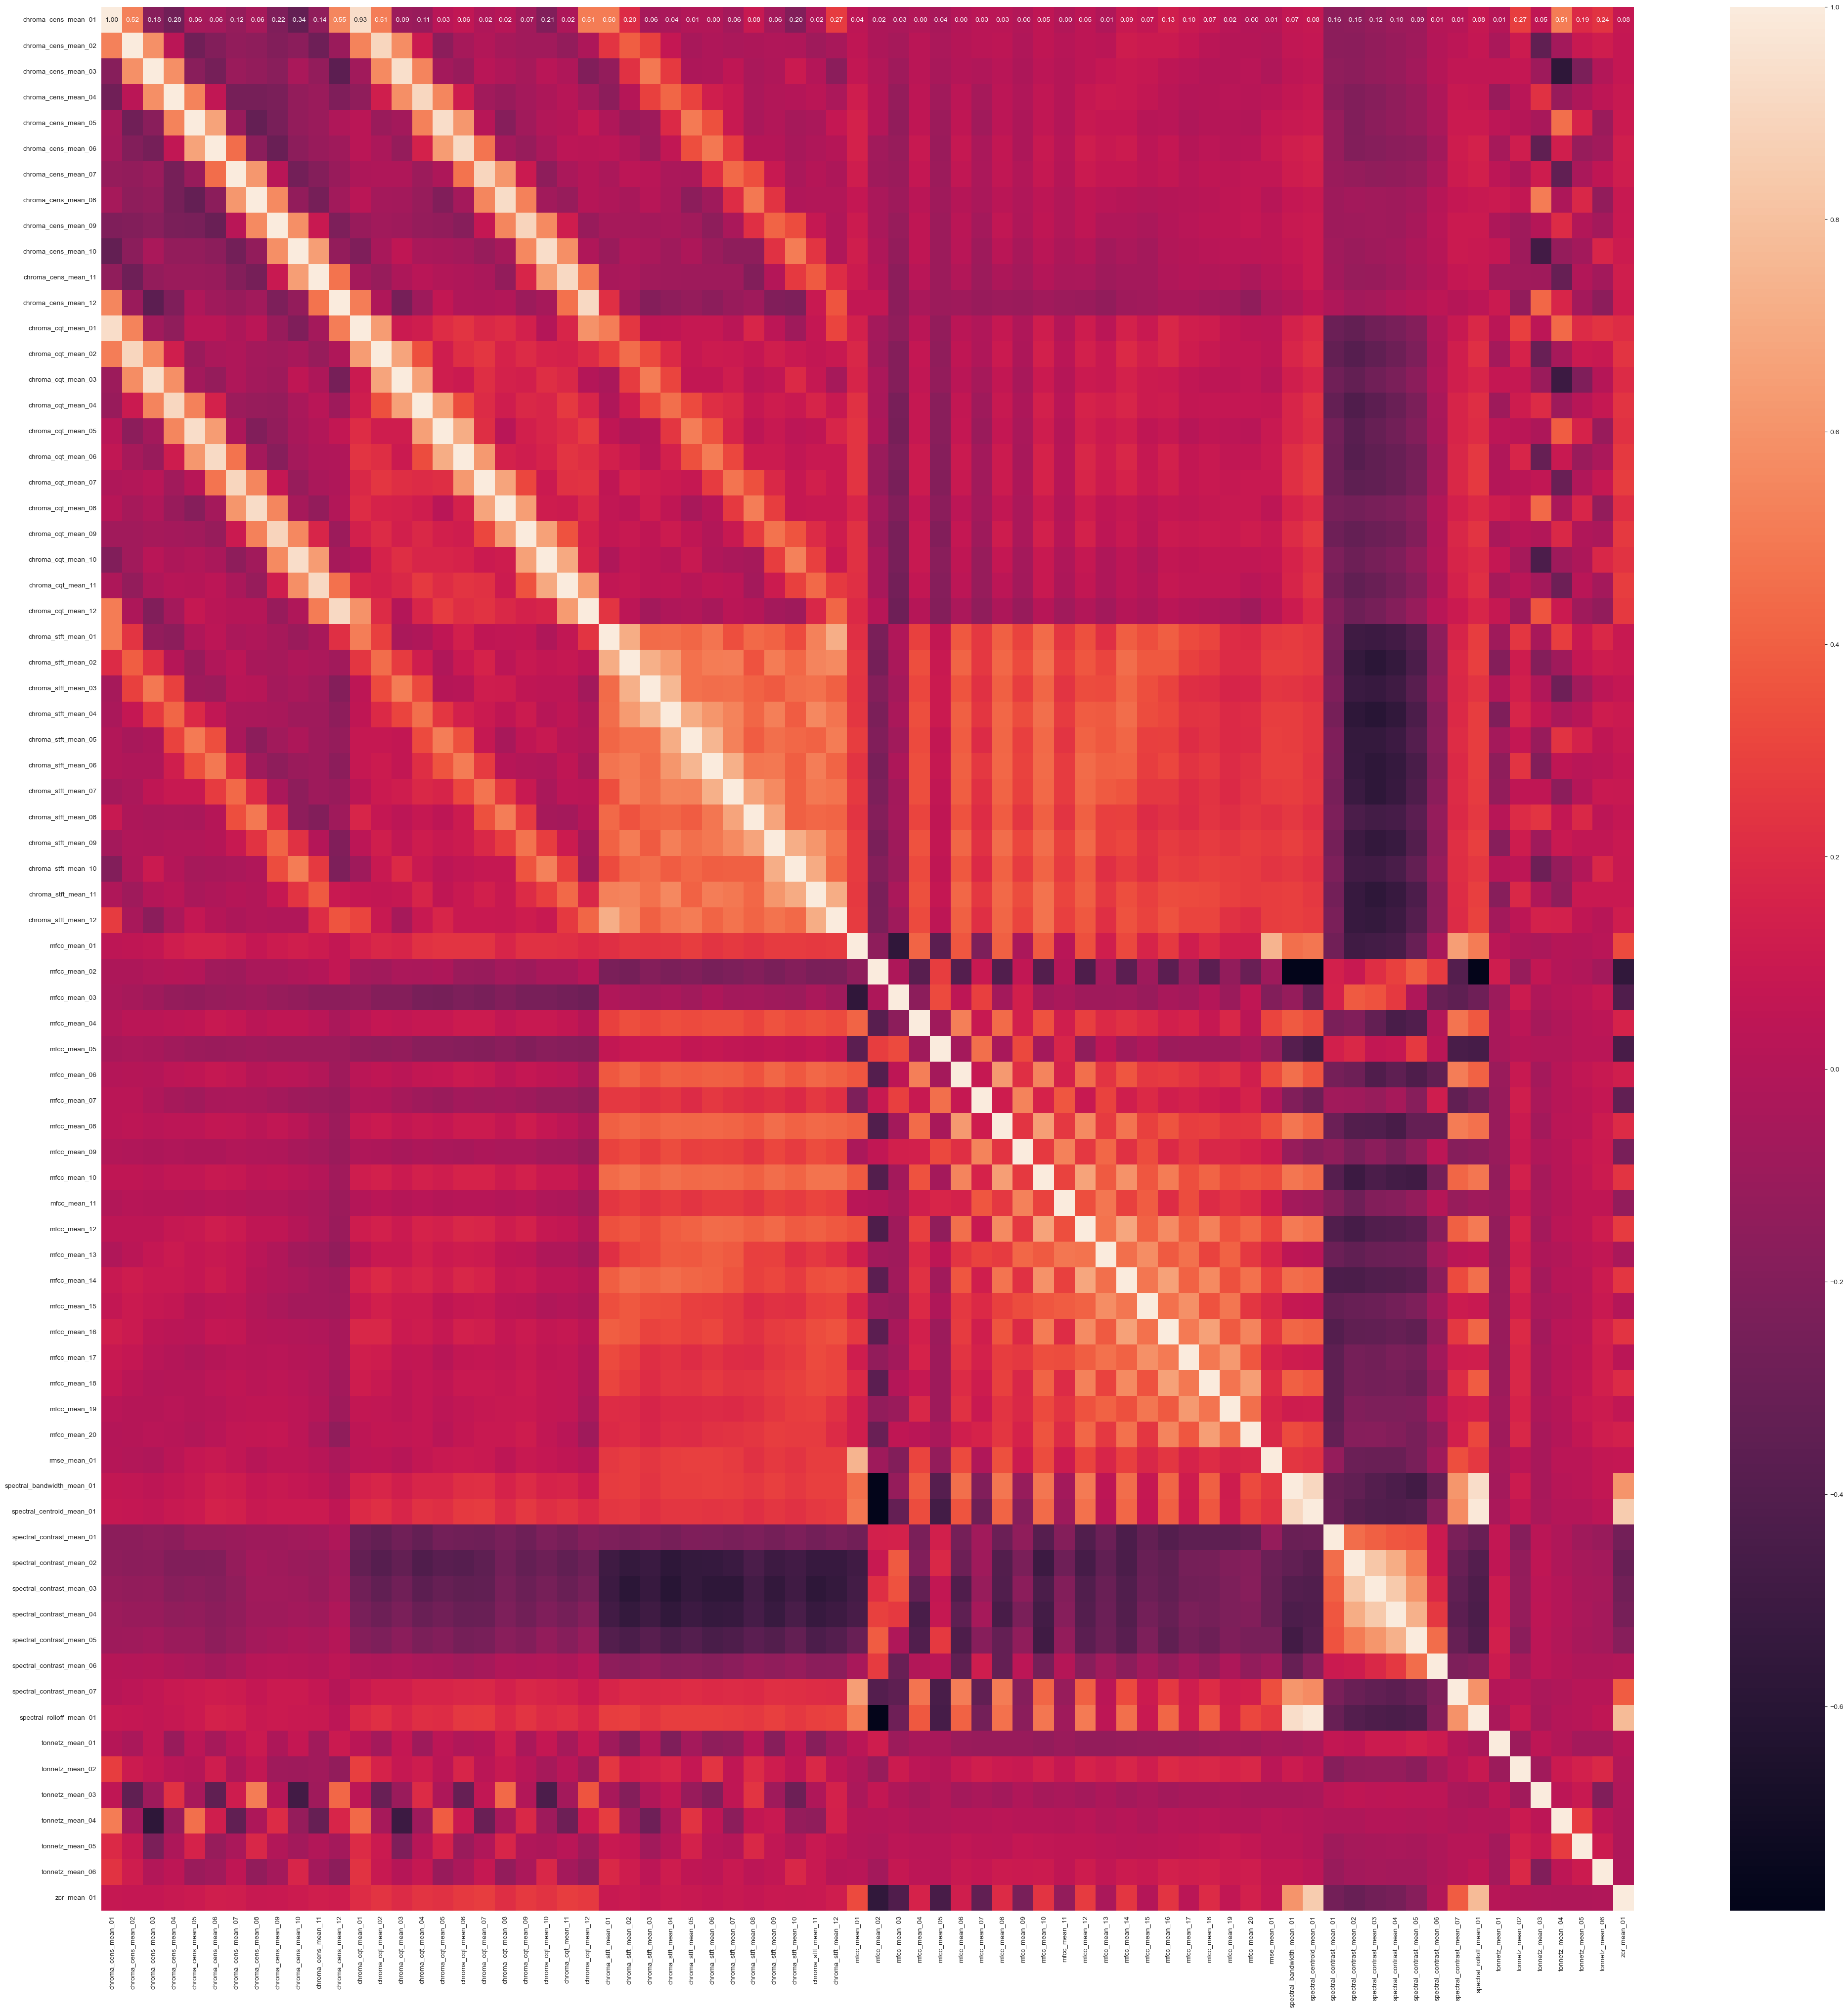

In [4]:
# Example of a corrleation plot
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_mean, annot=True, fmt=".2f")
plt.show()

In [5]:
from collections import Counter
import pprint
# Define a high correlation threshold
high_corr_threshold = 0.8

In [6]:
# Mean Feature reduction

# Find pairs of highly correlated features
high_corr_mean = [(correlation_mean.columns[i], correlation_mean.columns[j])
                           for i, j in zip(*upper_tri_mean)
                           if abs(correlation_mean.iloc[i, j]) > high_corr_threshold]

all_mean_features = [feature for pair in high_corr_mean for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_mean_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_mean)
print("")
print("Central Features")
pprint.pprint(central_features)

"""
As we can see in the output for example, with "spectral_rolloff_mean_01" 
we can explain the other two central features "spectral_bandwidth_mean_01" and "spectral_centroid_mean_01"
"""

mean_removals = ([pair[1] for pair in high_corr_mean[0:6]] + 
                 [pair[0] for pair in high_corr_mean[6:12]] + 
                 [high_corr_mean[12][0], high_corr_mean[14][1], high_corr_mean[15][1], 
                  high_corr_mean[16][0], high_corr_mean[17][1]])
print("")
print("Features to remove")
pprint.pprint(mean_removals)

# Standard deviation Feature reduction

# Find pairs of highly correlated features
high_corr_std = [(correlation_std.columns[i], correlation_std.columns[j])
                           for i, j in zip(*upper_tri_std)
                           if abs(correlation_std.iloc[i, j]) > high_corr_threshold]

all_std_features = [feature for pair in high_corr_std for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_std_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_std)
print("")
print("Central Features")
pprint.pprint(central_features)

std_removals = ['chroma_cens_std_03', 'chroma_cqt_std_08', 'chroma_cens_std_10',
                'mfcc_std_12', 'mfcc_std_14', 'mfcc_std_15', 'mfcc_std_17',
                'mfcc_std_18', 'mfcc_std_19', 'spectral_bandwidth_std_01',
                'spectral_centroid_std_01']
print("")
print("Features to remove")
pprint.pprint(std_removals)

# Min value Feature reduction

# Find pairs of highly correlated features
high_corr_min = [(correlation_min.columns[i], correlation_min.columns[j])
                           for i, j in zip(*upper_tri_min)
                           if abs(correlation_min.iloc[i, j]) > high_corr_threshold]

all_min_features = [feature for pair in high_corr_min for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_min_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_min)
print("")
print("Central Features")
pprint.pprint(central_features)

min_removals = ['chroma_cqt_min_01', 'chroma_cqt_min_03', 'chroma_cqt_min_04', 'chroma_cqt_min_06',
                'chroma_cqt_min_08', 'chroma_cqt_min_10', 'chroma_cqt_min_12',
                'chroma_stft_min_02', 'chroma_stft_min_03', 'chroma_stft_min_04', 'chroma_stft_min_06',
                'chroma_stft_min_07', 'chroma_stft_min_08', 'chroma_stft_min_09', 'chroma_stft_min_10',
                'chroma_stft_min_11', 'chroma_stft_min_12', 'spectral_bandwidth_min_01', 'spectral_rolloff_min_01']

print("")
print("Features to remove")
pprint.pprint(min_removals)

# Median Feature reduction

# Find pairs of highly correlated features
high_corr_median = [(correlation_median.columns[i], correlation_median.columns[j])
                           for i, j in zip(*upper_tri_median)
                           if abs(correlation_median.iloc[i, j]) > high_corr_threshold]

all_median_features = [feature for pair in high_corr_median for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_median_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_median)
print("")
print("Central Features")
pprint.pprint(central_features)

median_removals = ['chroma_cqt_median_12', 'chroma_stft_median_05', 'spectral_bandwidth_median_01',
                   'spectral_centroid_median_01', 'spectral_contrast_median_02', 'spectral_contrast_median_04']

print("")
print("Features to remove")
pprint.pprint(median_removals)

# Max value Feature reduction

# Find pairs of highly correlated features
high_corr_max = [(correlation_max.columns[i], correlation_max.columns[j])
                 for i, j in zip(*upper_tri_max)
                 if abs(correlation_max.iloc[i, j]) > high_corr_threshold]

all_max_features = [feature for pair in high_corr_max for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_max_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_max)
print("")
print("Central Features")
pprint.pprint(central_features)

max_removals = ['chroma_cqt_max_11', 'chroma_stft_max_10', 'chroma_stft_max_09']

print("")
print("Features to remove")
pprint.pprint(max_removals)

# Skewness Feature reduction

# Find pairs of highly correlated features
high_corr_skew = [(correlation_skew.columns[i], correlation_skew.columns[j])
                 for i, j in zip(*upper_tri_skew)
                 if abs(correlation_skew.iloc[i, j]) > high_corr_threshold]

all_skew_features = [feature for pair in high_corr_skew for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_skew_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_skew)
print("")
print("Central Features")
pprint.pprint(central_features)

skew_removals = ['chroma_cqt_skew_10', 'spectral_bandwidth_skew_01', 'spectral_centroid_skew_01']

print("")
print("Features to remove")
pprint.pprint(skew_removals)

# Kurtosis Feature reduction

# Find pairs of highly correlated features
high_corr_kurtosis = [(correlation_kurtosis.columns[i], correlation_kurtosis.columns[j])
                 for i, j in zip(*upper_tri_kurtosis)
                 if abs(correlation_kurtosis.iloc[i, j]) > high_corr_threshold]

all_kurtosis_features = [feature for pair in high_corr_kurtosis for feature in pair]

# Count the frequency of each feature in the list
feature_counts = Counter(all_kurtosis_features)

# Identify features that occur more than once and are therefore considered 'central'
central_features = [feature for feature, count in feature_counts.items() if count > 1]

print("Highly correlated features")
pprint.pprint(high_corr_kurtosis)
print("")
print("Central Features")
pprint.pprint(central_features)

kurtosis_removals = ['spectral_rolloff_kurtosis_01']

print("")
print("Features to remove")
pprint.pprint(kurtosis_removals)

Highly correlated features
[('chroma_cens_mean_01', 'chroma_cqt_mean_01'),
 ('chroma_cens_mean_02', 'chroma_cqt_mean_02'),
 ('chroma_cens_mean_03', 'chroma_cqt_mean_03'),
 ('chroma_cens_mean_04', 'chroma_cqt_mean_04'),
 ('chroma_cens_mean_05', 'chroma_cqt_mean_05'),
 ('chroma_cens_mean_06', 'chroma_cqt_mean_06'),
 ('chroma_cens_mean_07', 'chroma_cqt_mean_07'),
 ('chroma_cens_mean_08', 'chroma_cqt_mean_08'),
 ('chroma_cens_mean_09', 'chroma_cqt_mean_09'),
 ('chroma_cens_mean_10', 'chroma_cqt_mean_10'),
 ('chroma_cens_mean_11', 'chroma_cqt_mean_11'),
 ('chroma_cens_mean_12', 'chroma_cqt_mean_12'),
 ('spectral_bandwidth_mean_01', 'spectral_centroid_mean_01'),
 ('spectral_bandwidth_mean_01', 'spectral_rolloff_mean_01'),
 ('spectral_centroid_mean_01', 'spectral_rolloff_mean_01'),
 ('spectral_centroid_mean_01', 'zcr_mean_01'),
 ('spectral_contrast_mean_02', 'spectral_contrast_mean_03'),
 ('spectral_contrast_mean_03', 'spectral_contrast_mean_04')]

Central Features
['spectral_bandwidth_mean_0

In [7]:
feature_removal = mean_removals + std_removals + min_removals + median_removals + max_removals + skew_removals + kurtosis_removals
print("Number of Features to remove is " + str(len(feature_removal)))

# Drop the columns specified in feature_removal from X_train
X_train_reduced = X_train.drop(columns=feature_removal)
X_train_reduced

Number of Features to remove is 60


chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  \
Id                                                       
0                   -0.266585                -0.984668   
1                   -0.180061                 0.260884   
2                   -0.692900                 0.356662   
3                    0.243339                 0.214182   
4                   -0.968576                 0.309255   
...                       ...                      ...   
5995                 0.503490                -0.540720   
5996                -0.600597                 0.406386   
5997                -1.014298                -0.950744   
5998                -0.002938                 0.646034   
5999                -0.881917                -0.615638   

      chroma_cens_kurtosis_03  chroma_cens_kurtosis_04  \
Id                                                       
0                   -0.729823                -0.895122   
1                   -0.069373                 0.208734   
2                    0.062617                 0.248280   
3                   -0.049026                 1.456255   
4                    0.223164                 0.160960   
...                       ...                      ...   
5995                -0.690117                -0.107338   
5996                -0.748409                -0.316157   
5997                 0.618304                 0.204298   
5998                -0.732819                 1.205990   
5999                 0.891155                 4.850262   

      chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
Id                                                       
0                    2.138628                 0.935209   
1                   -0.078855                -0.577818   
2                    3.470037                 0.166613   
3                   -0.360826                -0.875256   
4                    0.919838                -0.111985   
...                       ...                      ...   
5995                -0.647856                -0.681969   
5996                -0.507428                -0.054214   
5997                -0.788411                -0.794254   
5998                -0.898733                -0.684953   
5999                -0.349280                -1.010980   

      chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  \
Id                                                       
0                    0.104089                -0.698659   
1                    0.583788                 0.143781   
2                    0.823874                 0.181112   
3                   -0.770200                 0.315500   
4                   -1.012521                -0.665692   
...                       ...                      ...   
5995                -0.246245                -0.546552   
5996                -0.476804                -0.373120   
5997                -0.586847                 0.099172   
5998                 0.134642                -0.374792   
5999                -0.577905                -0.046604   

      chroma_cens_kurtosis_09  chroma_cens_kurtosis_10  ...  tonnetz_std_03  \
Id                                                      ...                   
0                   -0.736408                -0.334376  ...        0.047646   
1                    0.291556                 0.007314  ...        0.083724   
2                    0.551939                 0.357985  ...        0.114119   
3                    0.789956                 0.448319  ...        0.062012   
4                   -0.316646                -0.264381  ...        0.114402   
...                       ...                      ...  ...             ...   
5995                 0.062783                 0.070393  ...        0.073908   
5996                -0.930158                -1.080690  ...        0.101630   
5997                -0.313476                -0.523417  ...        0.104782   
5998                -0.019524                -1.016032  ...        0.120826   
5999                -0.828026         

In [25]:
# Save the file
X_train_reduced.to_csv('X_train_reduced.csv', index=False)

## Feature extraction: ANOVA, Decision Trees, Feature Extraction: PCA, t-SNE, UMAP

In [30]:
# Standardize and PCA reduction
X_stand_full = StandardScaler().fit_transform(X_train)
X_stand_reduced = StandardScaler().fit_transform(X_train_reduced)


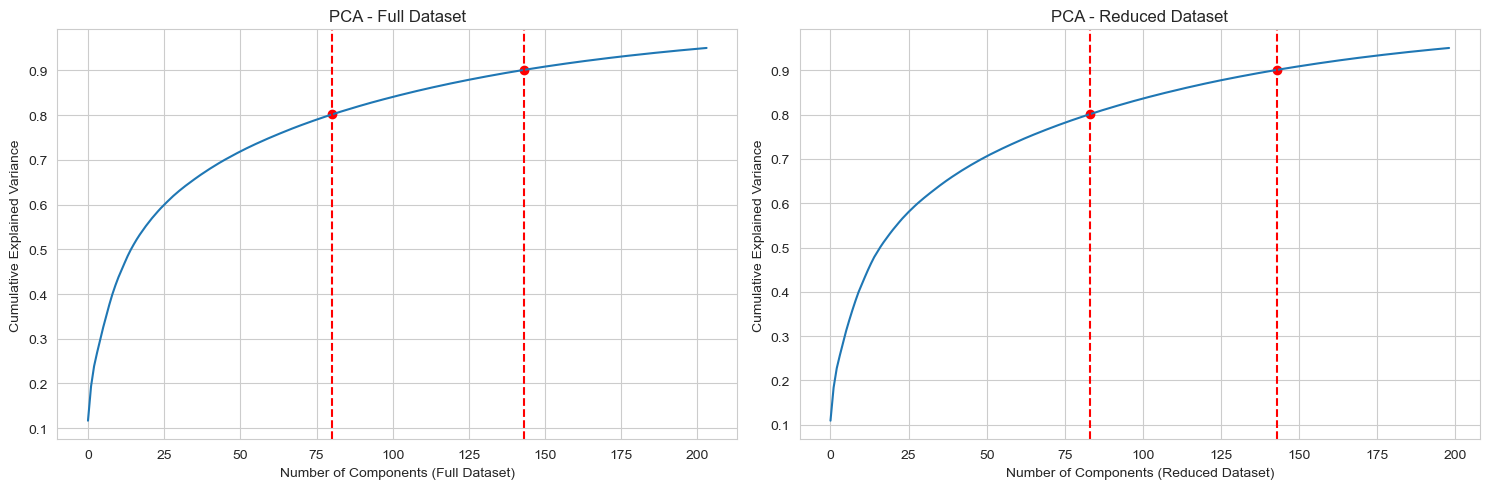

Original number of features: 518, Reduced number of features: 204
Original number of features: 458, Reduced number of features: 199


In [46]:
# PCA Anaylisis
pca_full = PCA(n_components=0.95)
pca_reduced = PCA(n_components=0.95)

X_pca_full = pca_full.fit_transform(X_stand_full)
X_pca_reduced = pca_reduced.fit_transform(X_stand_reduced)

idx_full_80 = np.where(np.cumsum(pca_full.explained_variance_ratio_) >= 0.8)[0][0]
idx_full_90 = np.where(np.cumsum(pca_full.explained_variance_ratio_) >= 0.9)[0][0]
idx_reduced_80 = np.where(np.cumsum(pca_reduced.explained_variance_ratio_) >= 0.8)[0][0]
idx_reduced_90 = np.where(np.cumsum(pca_reduced.explained_variance_ratio_) >= 0.9)[0][0]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for the full dataset on the first subplot
axes[0].plot(np.cumsum(pca_full.explained_variance_ratio_))
axes[0].set_xlabel('Number of Components (Full Dataset)')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('PCA - Full Dataset')
axes[0].set_yticks(np.arange(0, 1, step=0.1))
axes[0].scatter(idx_full_80, np.cumsum(pca_full.explained_variance_ratio_)[idx_full_80], color='red')  # Point for 0.8
axes[0].axvline(x=idx_full_80, color='red', linestyle='--')  # Vertical line for 0.8
axes[0].scatter(idx_full_90, np.cumsum(pca_full.explained_variance_ratio_)[idx_full_90], color='red')  # Point for 0.9
axes[0].axvline(x=idx_full_90, color='red', linestyle='--')  # Vertical line for 0.9

# Plot for the reduced dataset on the second subplot
axes[1].plot(np.cumsum(pca_reduced.explained_variance_ratio_))
axes[1].set_xlabel('Number of Components (Reduced Dataset)')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('PCA - Reduced Dataset')
axes[1].set_yticks(np.arange(0, 1, step=0.1))
axes[1].scatter(idx_reduced_80, np.cumsum(pca_reduced.explained_variance_ratio_)[idx_reduced_80], color='red')  # Point for 0.8
axes[1].axvline(x=idx_reduced_80, color='red', linestyle='--')  # Vertical line for 0.8
axes[1].scatter(idx_reduced_90, np.cumsum(pca_reduced.explained_variance_ratio_)[idx_reduced_90], color='red')  # Point for 0.9
axes[1].axvline(x=idx_reduced_90, color='red', linestyle='--')  # Vertical line for 0.9

# Adjust layout so plots are spaced nicely
plt.tight_layout()
plt.show()

print(f"Original number of features: {X_stand_full.shape[1]}, Reduced number of features: {X_pca_full.shape[1]}")
print(f"Original number of features: {X_stand_reduced.shape[1]}, Reduced number of features: {X_pca_reduced.shape[1]}")

In [15]:
X_pca_full = pd.DataFrame(X_pca_full).iloc[:,:140]
X_pca_reduced = pd.DataFrame(X_pca_reduced).iloc[:,:140]

In [16]:
# t-SNE Cluster Analysis
tsne_full_2d = TSNE(n_components=2, perplexity=70, learning_rate=500, n_iter=3000, random_state=42)
tsne_reduced_2d = TSNE(n_components=2, perplexity=70, learning_rate=500, n_iter=3000, random_state=42)

X_tsne_full_2d = tsne_full_2d.fit_transform(X_pca_full)
X_tsne_reduced_2d = tsne_reduced_2d.fit_transform(X_pca_reduced)

# Insert Labels
df_tsne_full_2d = pd.DataFrame(X_tsne_full_2d, columns=['tsne_1', 'tsne_2'])
df_tsne_full_2d = pd.concat([y_train.reset_index(), df_tsne_full_2d], axis=1).drop(columns=["Id"])
df_tsne_reduced_2d = pd.DataFrame(X_tsne_reduced_2d, columns=['tsne_1', 'tsne_2'])
df_tsne_reduced_2d = pd.concat([y_train.reset_index(), df_tsne_reduced_2d], axis=1).drop(columns=["Id"])


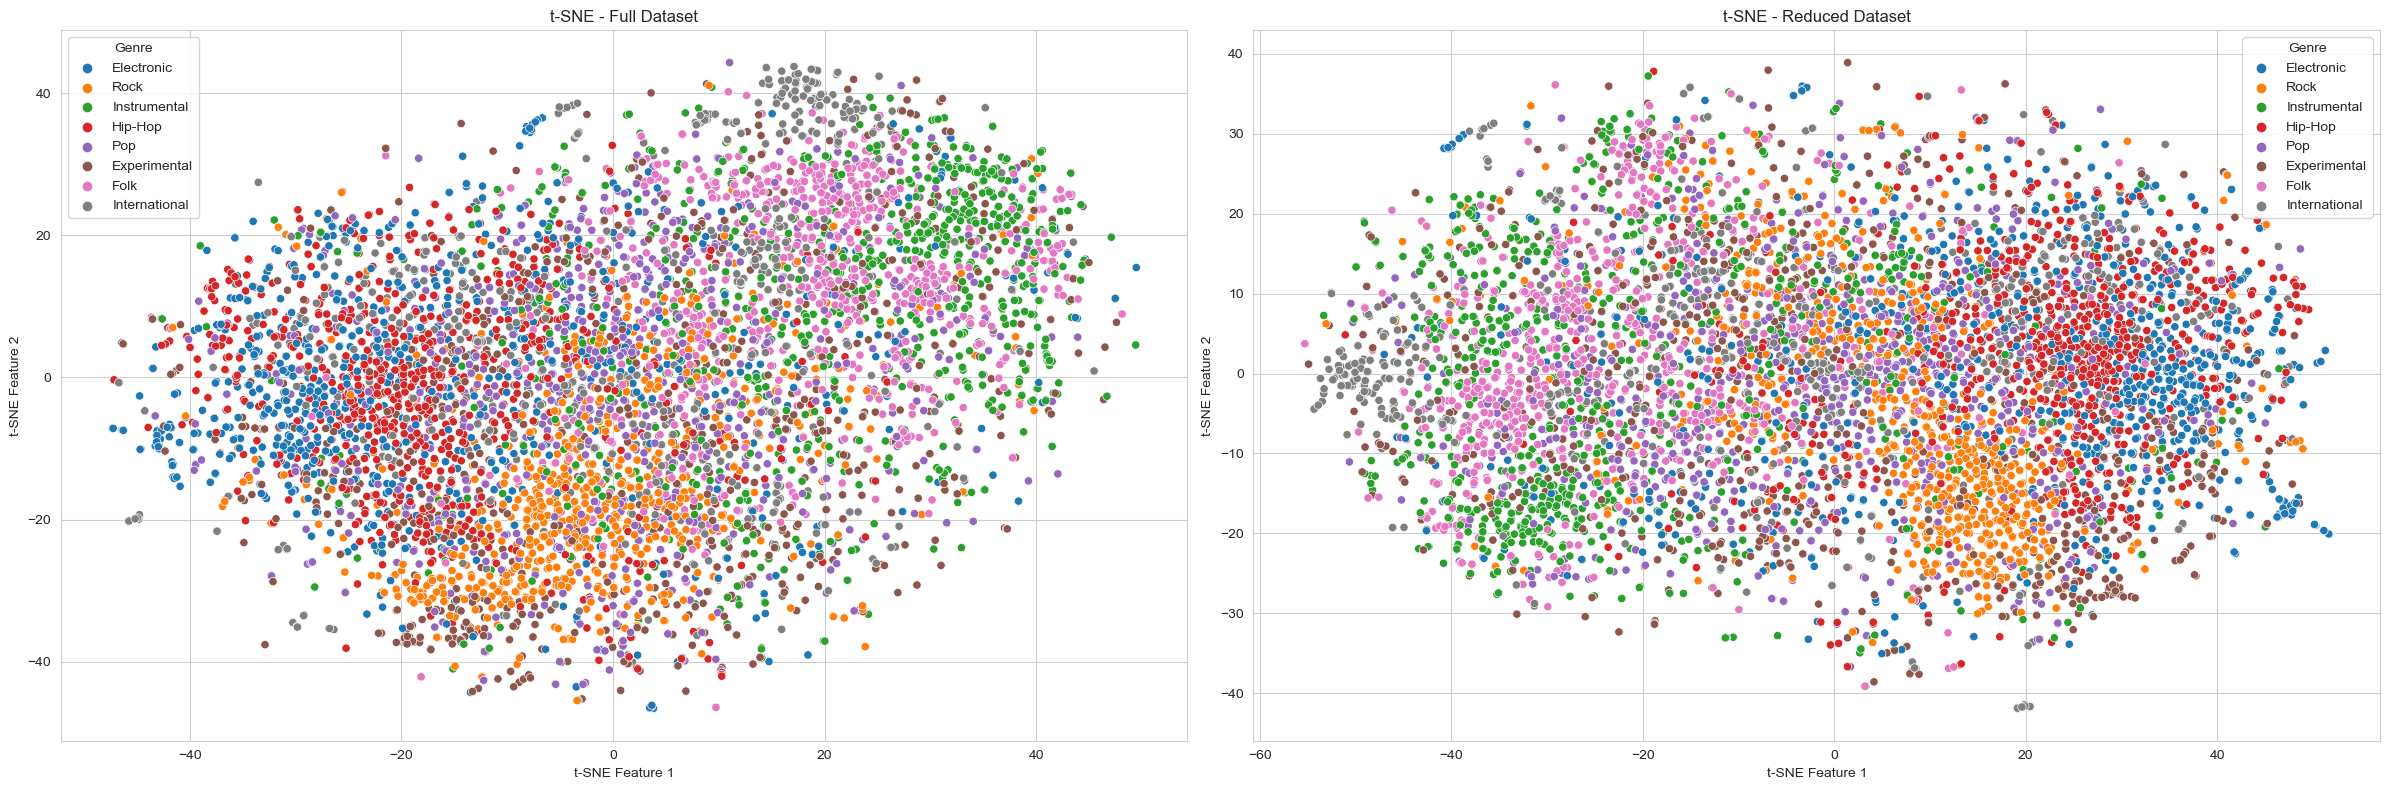

In [17]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Plot for the first dataset
sns.scatterplot(ax=axes[0], data=df_tsne_full_2d, x='tsne_1', y='tsne_2', hue='Genre')
axes[0].set_title('t-SNE - Full Dataset')
axes[0].set_xlabel('t-SNE Feature 1')
axes[0].set_ylabel('t-SNE Feature 2')
axes[0].legend(title='Genre')

# Plot for the second dataset
sns.scatterplot(ax=axes[1], data=df_tsne_reduced_2d, x='tsne_1', y='tsne_2', hue='Genre')
axes[1].set_title('t-SNE - Reduced Dataset')
axes[1].set_xlabel('t-SNE Feature 1')
axes[1].set_ylabel('t-SNE Feature 2')
axes[1].legend(title='Genre')

# Adjust layout so plots are spaced nicely
plt.tight_layout()
plt.show()


In [ ]:
# Initialize and fit UMAP
umap_full = umap.UMAP(n_neighbors=50, min_dist=0.25, n_components=2, random_state=42)
umap_reduced = umap.UMAP(n_neighbors=50, min_dist=0.25, n_components=2, random_state=42)

# Transform the standardized data
X_umap_full = umap_full.fit_transform(X_pca_full)
X_umap_reduced = umap_full.fit_transform(X_pca_reduced)

# Create a DataFrame for the UMAP output for convenient plotting
df_umap_full = pd.DataFrame(X_umap_full, columns=['UMAP1', 'UMAP2'])
df_umap_full['Genre'] = y_train

df_umap_reduced = pd.DataFrame(X_umap_reduced, columns=['UMAP1', 'UMAP2'])
df_umap_reduced['Genre'] = y_train

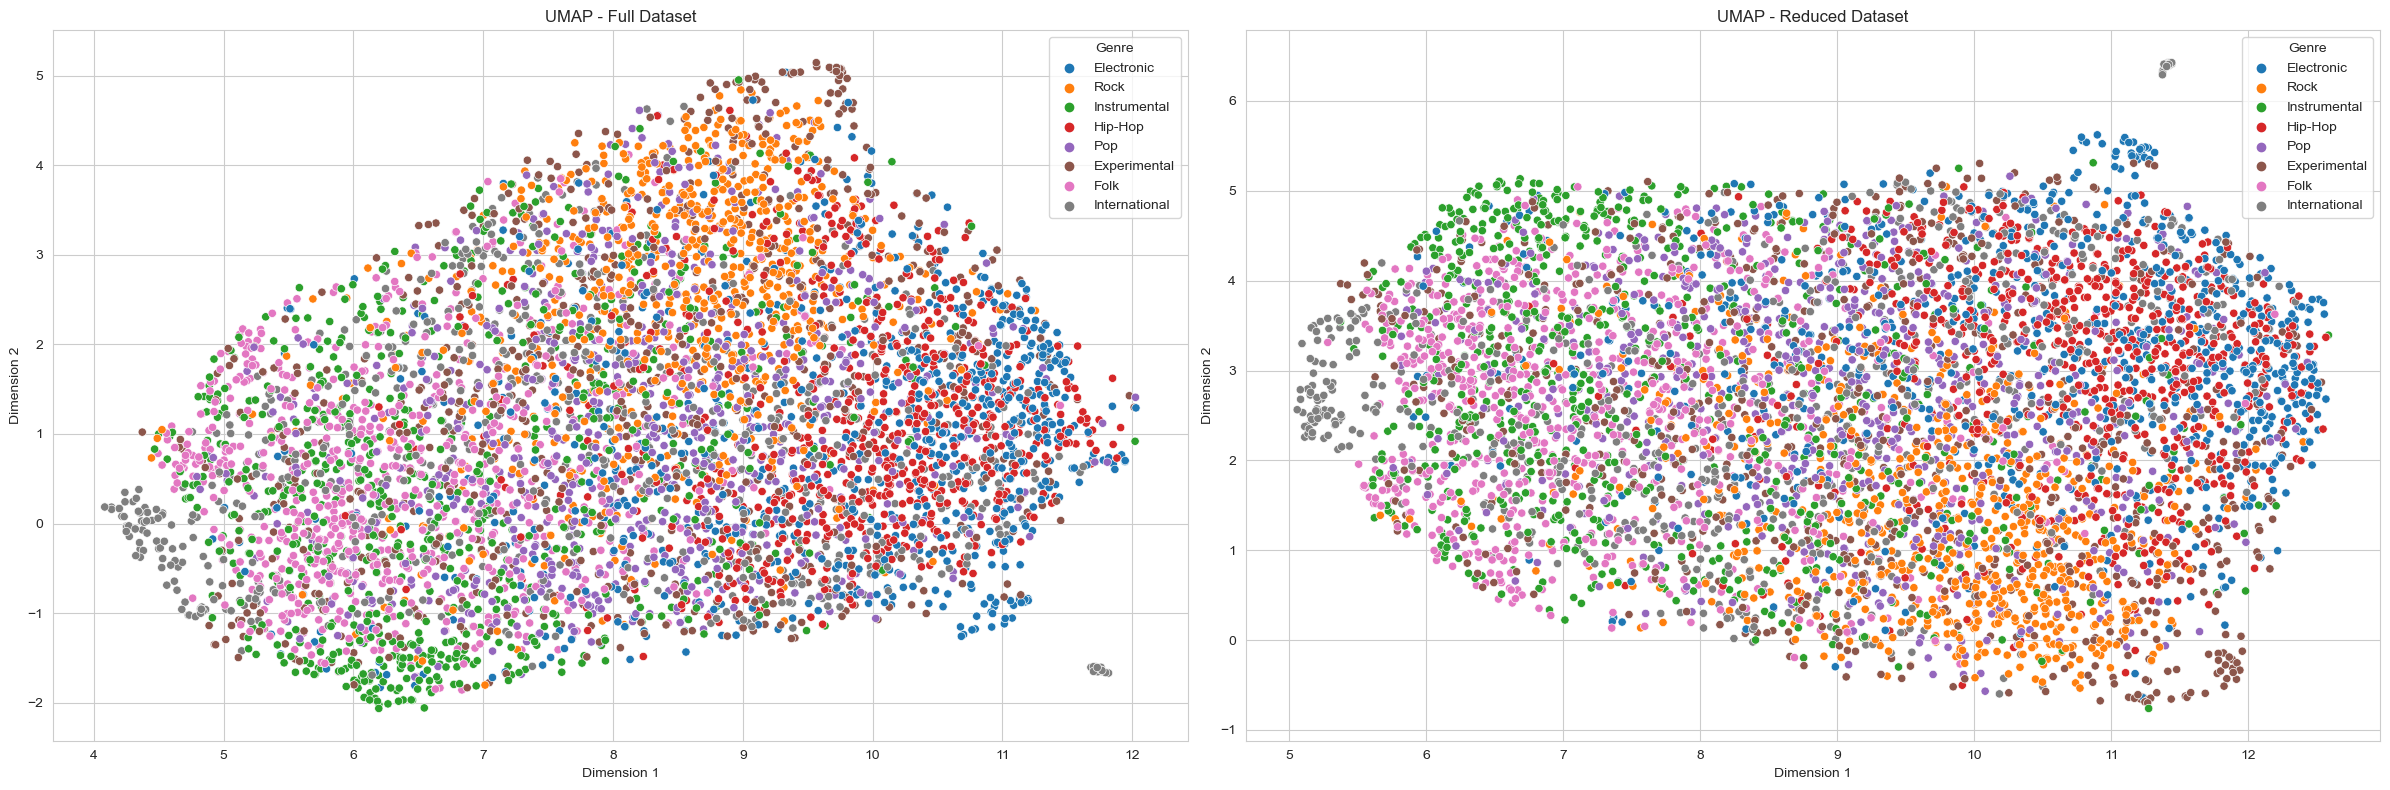

In [20]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Plot for the first dataset
sns.scatterplot(ax=axes[0], data=df_umap_full, x='UMAP1', y='UMAP2', hue='Genre')
axes[0].set_title('UMAP - Full Dataset')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend(title='Genre')

# Plot for the second dataset
sns.scatterplot(ax=axes[1], data=df_umap_reduced, x='UMAP1', y='UMAP2', hue='Genre')
axes[1].set_title('UMAP - Reduced Dataset')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend(title='Genre')

# Adjust layout so plots are spaced nicely
plt.tight_layout()
plt.show()

## ANOVA

## Model Selection

### k-nearest neighbors (KNN) with cross validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('Full dataset without normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_train_reduced, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('')
print('Reduced dataset without normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_stand_full, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('')
print('Full dataset with normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_stand_reduced, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('')
print('Reduced dataset with normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_pca_full, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('')
print('PCA full dataset with normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

performance = []
for i in range(1,41):
    # Create KNN model instance
    clf = KNeighborsClassifier(n_neighbors = i)
    # Perform cross-validation
    scores = cross_val_score(clf, X_pca_reduced, y_train.values.ravel(), cv = 5)  # cv=5 for 5-fold cross-validation
    performance.append(scores.mean())
print('')
print('PCA reduced dataset with normalization')
print('Max Score with k = ' + str(pd.Series(performance).idxmax() + 1), ':', max(performance))

Full dataset without normalization
Max Score with k = 21 : 0.3675

Reduced dataset without normalization
Max Score with k = 19 : 0.35483333333333333

Full dataset with normalization
Max Score with k = 11 : 0.4611666666666666

Reduced dataset with normalization
Max Score with k = 7 : 0.4661666666666666

PCA full dataset with normalization
Max Score with k = 12 : 0.4678333333333334

PCA reduced dataset with normalization
Max Score with k = 12 : 0.471


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Define a distribution of parameters
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': randint(3, 20),  # Maximum depth of the tree
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 11),  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at every split
}
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
# Initialize RandomizedSearchCV with the classifier, parameter distribution, and number of iterations
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
# Fit the model
random_search.fit(X_train, y_train.values.ravel())
# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best estimator directly
best_rf = random_search.best_estimator_

# Optionally, evaluate the performance of the best model found
best_cv_score = random_search.best_score_
print("Best CV score from Randomized Search: ", best_cv_score)

# Best parameters found:  {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 954}
# Best CV score from Randomized Search:  0.5660000000000001

In [50]:
rf_clf = RandomForestClassifier(n_estimators = 954, random_state = 42, max_depth=19, max_features='sqrt',
                                min_samples_leaf=2, min_samples_split=7)
cv_scores = cross_val_score(rf_clf, X_train, y_train.values.ravel(), cv = 5)
print('Cross-validated accuracy (Random Forest): ', cv_scores.mean())
print('Standard Deviation of CV Scores (Random Forest): ', cv_scores.std())

Cross-validated accuracy (Random Forest):  0.5660000000000001
Standard Deviation of CV Scores (Random Forest):  0.010211649121360283


In [51]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cv_scores = cross_val_score(rf_clf, X_train, y_train.values.ravel(), cv = 5)
print('Cross-validated accuracy (Random Forest): ', cv_scores.mean())
print('Standard Deviation of CV Scores (Random Forest): ', cv_scores.std())

Cross-validated accuracy (Random Forest):  0.5566666666666666
Standard Deviation of CV Scores (Random Forest):  0.009098229375970775


In [57]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cv_scores = cross_val_score(rf_clf, X_train_reduced, y_train.values.ravel(), cv = 5)
print('Cross-validated accuracy (Random Forest): ', cv_scores.mean())
print('Standard Deviation of CV Scores (Random Forest): ', cv_scores.std())

Cross-validated accuracy (Random Forest):  0.5616666666666666
Standard Deviation of CV Scores (Random Forest):  0.012538828582536021


In [58]:
#Best parameters found:  {'n_estimators': 817, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_depth': 14}
rf_clf = RandomForestClassifier(n_estimators = 817, random_state = 42, min_samples_split=9, min_samples_leaf=10, max_depth=14)
cv_scores = cross_val_score(rf_clf, X_train_reduced, y_train.values.ravel(), cv = 5)
print('Cross-validated accuracy (Random Forest): ', cv_scores.mean())
print('Standard Deviation of CV Scores (Random Forest): ', cv_scores.std())


Cross-validated accuracy (Random Forest):  0.5468333333333334
Standard Deviation of CV Scores (Random Forest):  0.009448691855372235


### Deep Neural Network

In [2]:
!pip3 install --upgrade tensorflow

  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.0.5-py3-none-any.whl.metadata (4.8 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 13.0 MB/s eta 0:00:00a 0:00:01
Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 9.9 MB/s eta 0:00:00:00:01
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.7 MB/s eta 0:00:00
Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py

In [13]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy
from sklearn.preprocessing import LabelEncoder

In [6]:
X_train = StandardScaler().fit_transform(X_train)
num_features = X_train.shape[1]
num_genres = 8

In [14]:
## GOOOOOOD
model = Sequential([
    Input(shape=(num_features,)),  # Use an Input layer to define the input shape
    Dense(512, activation='relu'),
    Dropout(0.75),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_genres, activation='softmax')
])

early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 5)

# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_genres)

In [15]:
# Train the model
hist = model.fit(X_train, y_train_one_hot,
                 batch_size = 128,
                 epochs = 100,
                 verbose = 1,
                 validation_split = 0.2,
                 callbacks = [early_stopping_callback])

# Summarize the model
model.summary()

print("Learning stopped on epoch:", early_stopping_callback.stopped_epoch)

Epoch 1/100


2024-03-16 17:56:58.390202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.1636 - loss: 2.5744 - val_accuracy: 0.3950 - val_loss: 1.7465
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3012 - loss: 1.8700 - val_accuracy: 0.4550 - val_loss: 1.6137
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3549 - loss: 1.7229 - val_accuracy: 0.4767 - val_loss: 1.5140
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4040 - loss: 1.6483 - val_accuracy: 0.5125 - val_loss: 1.4399
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4201 - loss: 1.5724 - val_accuracy: 0.5325 - val_loss: 1.3944
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4595 - loss: 1.5186 - val_accuracy: 0.5208 - val_loss: 1.3570
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4753 - loss: 1.4500 - val_accuracy: 0.5558 - val_loss: 1.3231
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5009 - loss: 1.4166 - val_accuracy: 0.5600 - val_l

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       265,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985,306 (7.57 MB)

 Trainable params: 661,768 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,323,538 (5.05 MB)

Learning stopped on epoch: 27


 ### Playing Around

In [ ]:
tsne_full_3d = TSNE(n_components=3, perplexity=70, learning_rate=1000, n_iter=3000, random_state=42)
tsne_reduced_3d = TSNE(n_components=3, perplexity=70, learning_rate=1000, n_iter=3000, random_state=42)
X_tsne_full_3d = tsne_full_3d.fit_transform(X_pca_full)
X_tsne_reduced_3d = tsne_reduced_3d.fit_transform(X_pca_reduced)

df_tsne_full_3d = pd.DataFrame(X_tsne_full_3d, columns=['tsne_1', 'tsne_2', 'tsne_3'])
df_tsne_full_3d = pd.concat([y_train.reset_index(), df_tsne_full_3d], axis=1).drop(columns=["Id"])
df_tsne_reduced_3d = pd.DataFrame(X_tsne_reduced_3d, columns=['tsne_1', 'tsne_2', 'tsne_3'])
df_tsne_reduced_3d = pd.concat([y_train.reset_index(), df_tsne_reduced_3d], axis=1).drop(columns=["Id"])

In [93]:
# Apply t-SNE to the standardized data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


In [107]:
df_3d = pd.DataFrame(X_tsne_3d, columns=['tsne_1', 'tsne_2', 'tsne_3'])
df_3d = pd.concat([y_train.reset_index(), df_3d], axis=1)
df_3d = df_3d.iloc[:, 1:]
df_3d

Genre     tsne_1     tsne_2     tsne_3
0       Electronic  25.520332 -14.359931  10.068596
1             Rock  11.885706 -17.911165   7.777205
2     Instrumental  -9.102730 -14.096588  28.017584
3          Hip-Hop  15.086772 -13.237709  22.100460
4             Rock  -2.457722 -34.519859  12.850332
...            ...        ...        ...        ...
5995       Hip-Hop  22.565107  11.750340 -14.217091
5996          Rock   3.804966  12.131495  21.387346
5997           Pop -14.765530  15.335332   9.200875
5998  Instrumental -21.953876 -19.525331  21.300020
5999  Instrumental -28.349590  25.128302   8.765721

[6000 rows x 4 columns]

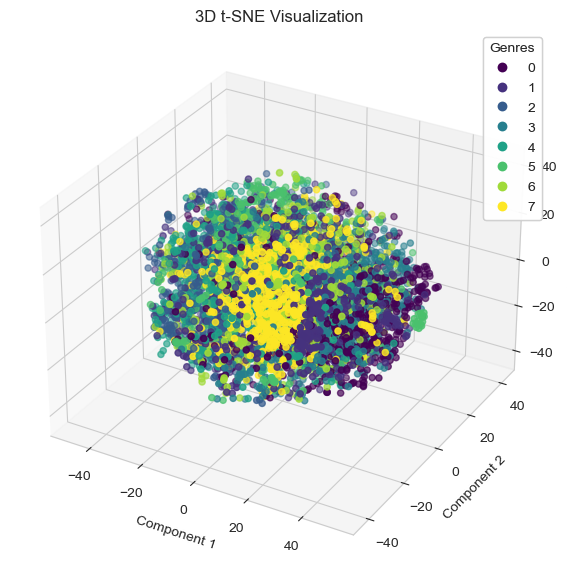

In [108]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting
# Replace 'tsne_1', 'tsne_2', 'tsne_3', and 'Genre' with your actual column names
scatter = ax.scatter(df_3d['tsne_1'], df_3d['tsne_2'], df_3d['tsne_3'], c=pd.Categorical(df_3d['Genre']).codes, cmap='viridis')

# Creating a legend with genre names
# Extract unique genres and their corresponding colors from the plot
unique_genres = df_3d['Genre'].unique()
# Create a custom legend
legend = ax.legend(*scatter.legend_elements(), title="Genres")
ax.add_artist(legend)

# Labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D t-SNE Visualization')

plt.show()

#### Add analysis of mean, sd, and skewness, outlier?

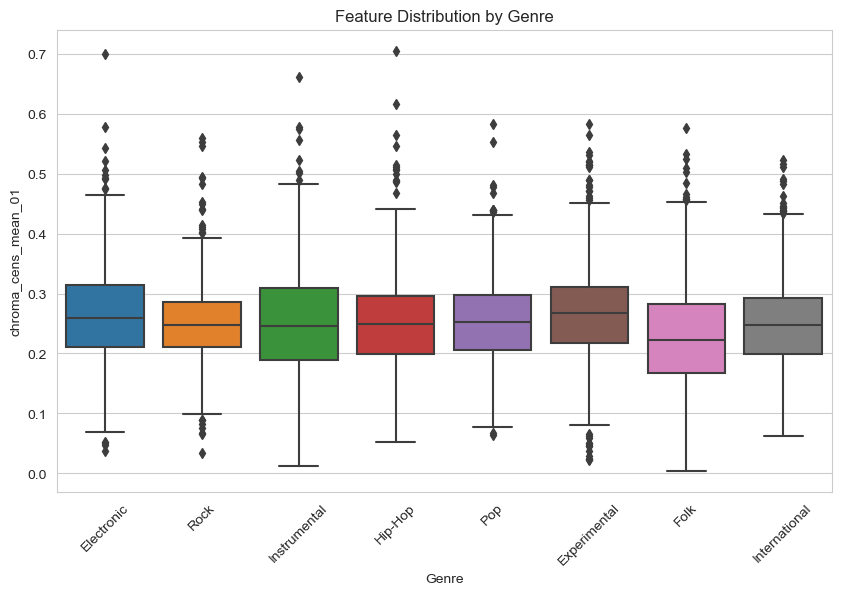

In [17]:
# Box plot for a specific feature across genres
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='chroma_cens_mean_01', data=df_merged)
plt.title('Feature Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

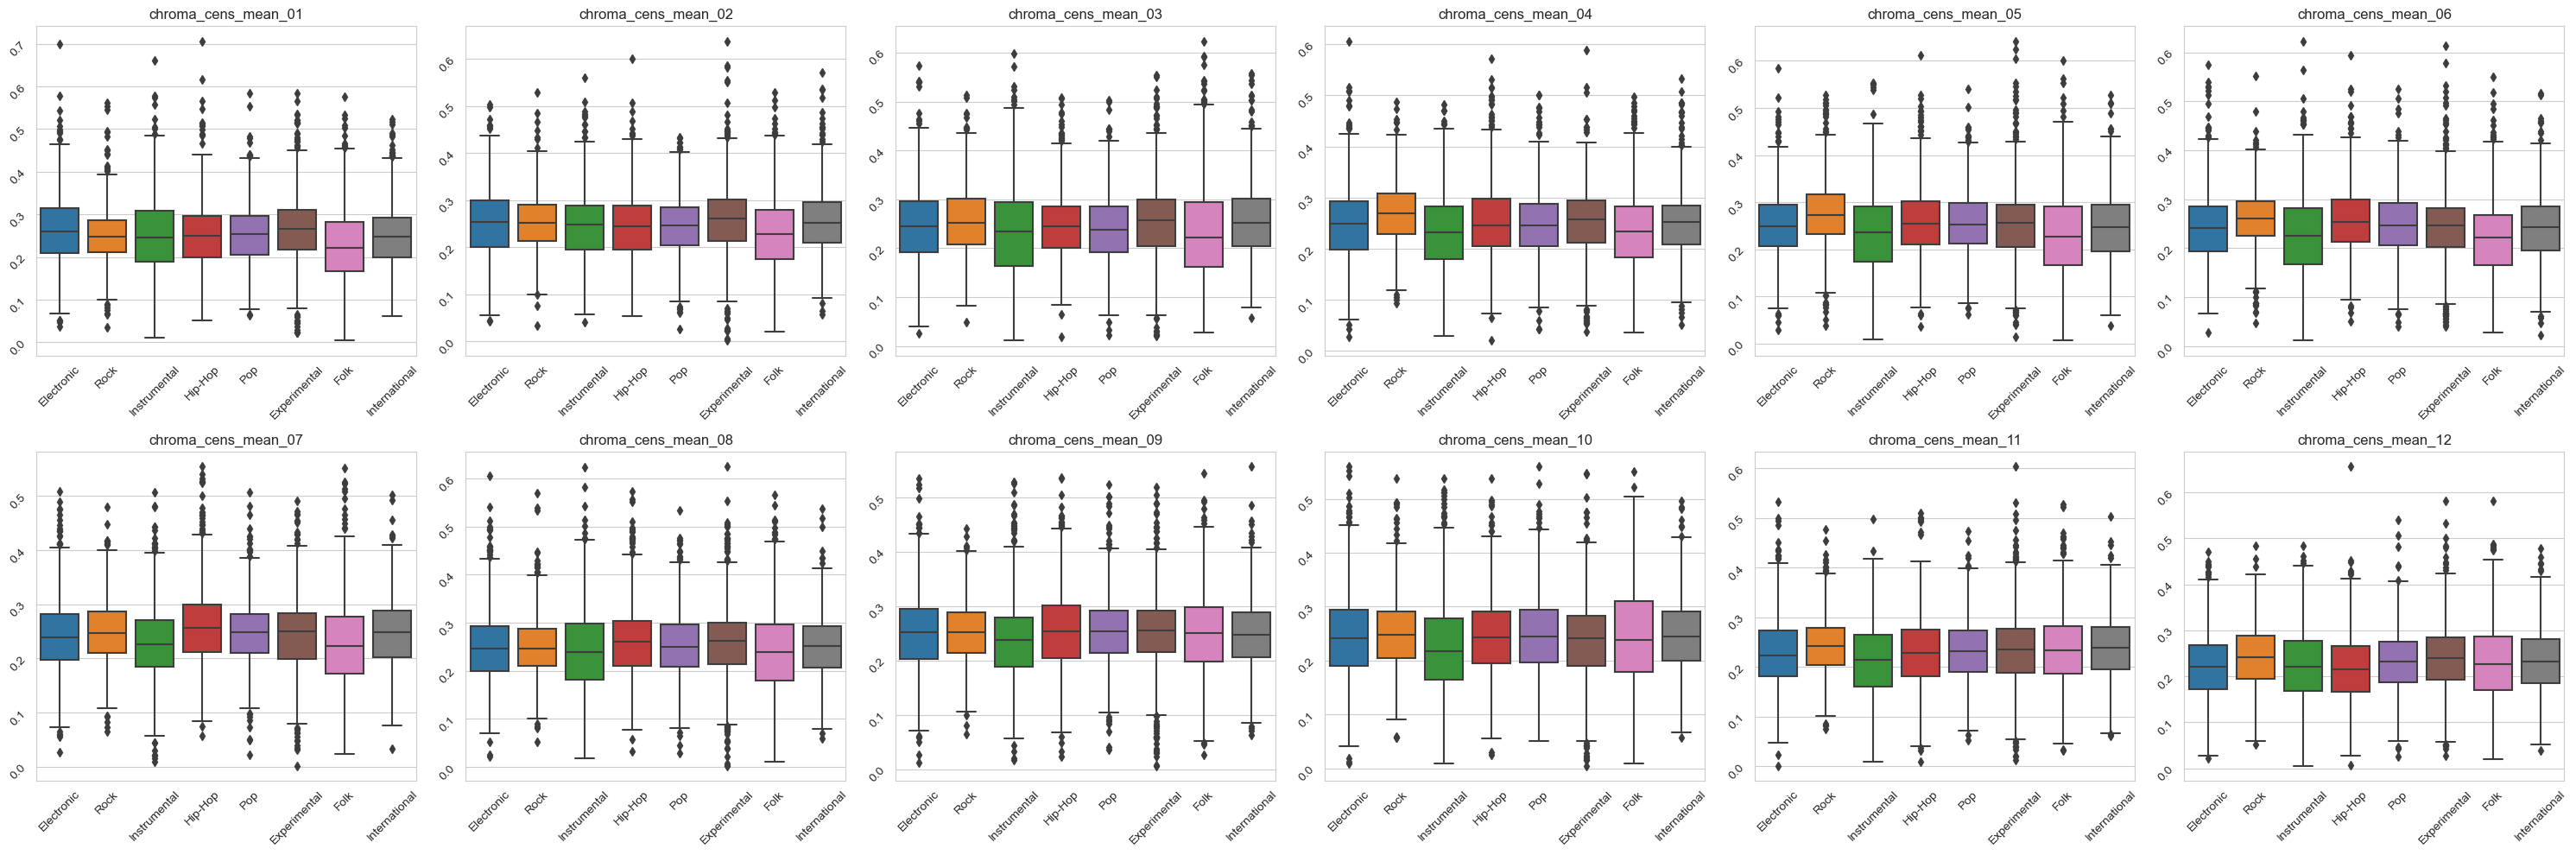

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure, specifying the overall grid size: 2 rows, 6 columns
fig, axes = plt.subplots(2, 6, figsize=(30, 10))

names = ["chroma_cens_mean_01", "chroma_cens_mean_02", "chroma_cens_mean_03", "chroma_cens_mean_04", "chroma_cens_mean_05", "chroma_cens_mean_06", 
         "chroma_cens_mean_07", "chroma_cens_mean_08", "chroma_cens_mean_09", "chroma_cens_mean_10", "chroma_cens_mean_11", "chroma_cens_mean_12"]

for i in range(12):
    row, col = divmod(i, 6)
    sns.boxplot(x = "Genre", y = names[i], data = df_merged, ax = axes[row, col])
    axes[row, col].set_title(names[i])
    axes[row, col].set_xlabel('')  # Optional: remove x-axis label for clarity
    axes[row, col].set_ylabel('')  # Optional: remove y-axis label for clarity
    axes[row, col].tick_params(labelrotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

